<a href="https://colab.research.google.com/github/krishnadixit05/AI/blob/main/AI_lab_14(Reinforcement).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Reinforcement Learning

In [ ]:
import numpy as np
import pylab as pl
import networkx as nx

In [ ]:
#define the graph
edges = [(0,1),(1,0),(2,0),(3,5),(2,7),(5,6),(7,8),(8,9),(0,5),(4,9),(5,8),(10,10),(10,1),(2,9),(10,5)]

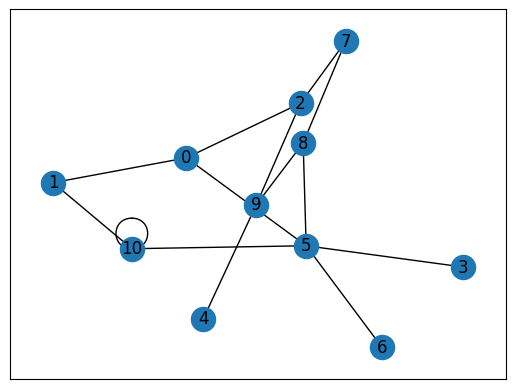

In [ ]:
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
pl.show()

In [ ]:
Matrix_size = 11
goal = 10
#Reward matrix
R = np.matrix(np.ones((Matrix_size,Matrix_size)))
R*=-1

In [ ]:
R

matrix([[ -1.,   0.,   0.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,
          -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
         100.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,
          -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,
          -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,
          -1.],
        [  0.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.,
         100.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,
          -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,
          -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.,   0.,
          -1.],
        [ -1.,  -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,
          -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,
         100.]])

In [ ]:
for edge in edges:
  if(edge[1]==goal):
    R[edge] = 100
  else:
    R[edge] = 0
  if(edge[0]==goal):
    R[edge[::-1]]=100
  else:
    R[edge[::-1]]=0
R[goal,goal]=100
print(R)

[[ -1.   0.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [  0.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [  0.  -1.  -1.   0.  -1.  -1.   0.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1. 100.]]


In [ ]:
Q = np.matrix(np.zeros((Matrix_size,Matrix_size)))

In [ ]:
initial_state=1 #random

In [ ]:
def available_states(state):
  current_row=R[state,]
  available_options = np.where(current_row>-1)[1]
  return available_options

In [ ]:
def next_state_selection(available_options):
  return (int(np.random.choice(available_options,1)))

In [ ]:
def Q_update_value(current_state, action,gamma):
  max_index=np.where(Q[action]==np.max(Q[action,]))[1]
  if(max_index.shape[0]>1):
    max_index=int(np.random.choice(max_index,1))
  else:
    max_index=int(max_index)
  max_value=Q[action,max_index]
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  if(np.max(Q)>0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return(0)

In [ ]:
#training the model
score=[]
gamma=0.75
for i in range (1000):
  current_state=np.random.randint(0,int(Q.shape[0]))
  available_paths=available_states(current_state)
  next_state=next_state_selection(available_paths)
  scores=Q_update_value(current_state,next_state,gamma)
  score.append(scores)

<ipython-input-14-e5d57d9695b5>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return (int(np.random.choice(available_options,1)))
<ipython-input-15-8037bd38eeb6>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index=int(np.random.choice(max_index,1))
<ipython-input-15-8037bd38eeb6>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index=int(max_index)


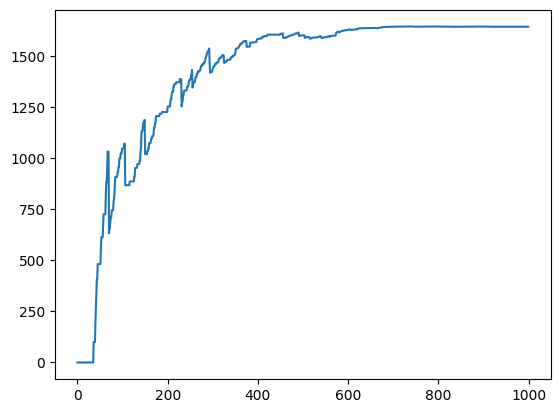

In [ ]:
pl.plot(score)

In [ ]:
current_state=2
steps=[current_state]
while(current_state!=goal):
  max_index=np.where(Q[current_state]==np.max(Q[current_state,]))[1]
  if(max_index.shape[0]>1):
    max_index=int(np.random.choice(max_index,1))
  else:
    max_index=int(max_index)
  steps.append(max_index)
  current_state=max_index
steps

<ipython-input-18-8665a48b8e32>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index=int(max_index)


[2, 0, 5, 10]